In [10]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score, precision_recall_curve
from sklearn.metrics import roc_auc_score, roc_curve, auc, average_precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("PS_20174392719_1491204439457_log.csv")
print(df.head())

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  


In [11]:
df = pd.get_dummies(df, prefix_sep="_", columns=['type'])
for col in ["nameOrig","nameDest"]:
    df[col] = df[col].astype('category')
    df[col] = df[col].cat.codes
    
X = df.drop('isFraud', 1)
y = df.isFraud
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)
print(X.head())

   step    amount  nameOrig  oldbalanceOrg  newbalanceOrig  nameDest  \
0     1   9839.64    757869       170136.0       160296.36   1662094   
1     1   1864.28   2188998        21249.0        19384.72   1733924   
2     1    181.00   1002156          181.0            0.00    439685   
3     1    181.00   5828262          181.0            0.00    391696   
4     1  11668.14   3445981        41554.0        29885.86    828919   

   oldbalanceDest  newbalanceDest  isFlaggedFraud  type_CASH_IN  \
0             0.0             0.0               0             0   
1             0.0             0.0               0             0   
2             0.0             0.0               0             0   
3         21182.0             0.0               0             0   
4             0.0             0.0               0             0   

   type_CASH_OUT  type_DEBIT  type_PAYMENT  type_TRANSFER  
0              0           0             1              0  
1              0           0             1  

In [12]:
#Using the rbf kernel to build the initial model.
# classifier= svm.SVC(C= 1, kernel= 'linear', random_state= 0)
regressor = LogisticRegression(random_state=0)

# #Fit into Model
regressor.fit(X_train, y_train)

# #Predict the class using X_test
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn import metrics

average_precision = average_precision_score(y_test, y_pred)
cls_report = classification_report(y_test, y_pred)

print("*****************************************************************")
print("Area under the curve : %f" % (roc_auc_score(y_test, y_pred)))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Average precision-recall score RF: {}".format(average_precision))
print(cls_report)
print("*****************************************************************")

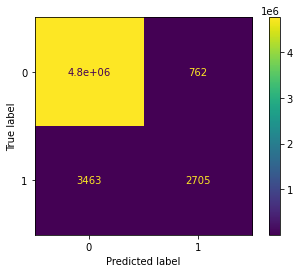

In [14]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(regressor, X_train, y_train)